In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9f4b4543f2384e32547eff1a1107ac1


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | cape town
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | pevek
Processing Record 4 of Set 13 | nanortalik
Processing Record 5 of Set 13 | hobart
Processing Record 6 of Set 13 | lakes entrance
Processing Record 7 of Set 13 | port hardy
Processing Record 8 of Set 13 | benghazi
Processing Record 9 of Set 13 | ilulissat
Processing Record 10 of Set 13 | dikson
Processing Record 11 of Set 13 | port alfred
Processing Record 12 of Set 13 | marawi
Processing Record 13 of Set 13 | tautira
Processing Record 14 of Set 13 | mataura
Processing Record 15 of Set 13 | road town
Processing Record 16 of Set 13 | hermanus
Processing Record 17 of Set 13 | vaini
Processing Record 18 of Set 13 | xuddur
Processing Record 19 of Set 13 | urumqi
Processing Record 20 of Set 13 | geraldton
Processing Record 21 of Set 13 | eydhafushi
Processing Record 22 of Set 13 | illoqqortoormiut
City not fou

Processing Record 37 of Set 16 | castro
Processing Record 38 of Set 16 | ulaanbaatar
Processing Record 39 of Set 16 | georgetown
Processing Record 40 of Set 16 | wahran
City not found. Skipping...
Processing Record 41 of Set 16 | lasa
Processing Record 42 of Set 16 | sikasso
Processing Record 43 of Set 16 | nome
Processing Record 44 of Set 16 | tasiilaq
Processing Record 45 of Set 16 | hobyo
Processing Record 46 of Set 16 | victoria
Processing Record 47 of Set 16 | necochea
Processing Record 48 of Set 16 | rondonopolis
Processing Record 49 of Set 16 | kavieng
Processing Record 50 of Set 16 | souillac
Processing Record 1 of Set 17 | waingapu
Processing Record 2 of Set 17 | ostersund
Processing Record 3 of Set 17 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 17 | itoman
Processing Record 5 of Set 17 | weihai
Processing Record 6 of Set 17 | zinder
Processing Record 7 of Set 17 | puerto rondon
Processing Record 8 of Set 17 | vallenar
Processing Record 9 of Set 17 | h

Processing Record 26 of Set 20 | claresholm
Processing Record 27 of Set 20 | talnakh
Processing Record 28 of Set 20 | thinadhoo
Processing Record 29 of Set 20 | jiuquan
Processing Record 30 of Set 20 | san carlos de bariloche
Processing Record 31 of Set 20 | broome
Processing Record 32 of Set 20 | bilma
Processing Record 33 of Set 20 | fez
Processing Record 34 of Set 20 | timberlake
Processing Record 35 of Set 20 | beloha
Processing Record 36 of Set 20 | mazeikiai
Processing Record 37 of Set 20 | ucluelet
Processing Record 38 of Set 20 | meyungs
City not found. Skipping...
Processing Record 39 of Set 20 | baramula
Processing Record 40 of Set 20 | demak
Processing Record 41 of Set 20 | meulaboh
Processing Record 42 of Set 20 | mantua
Processing Record 43 of Set 20 | santo domingo
Processing Record 44 of Set 20 | keti bandar
Processing Record 45 of Set 20 | moose factory
Processing Record 46 of Set 20 | solovetskiy
City not found. Skipping...
Processing Record 47 of Set 20 | klaksvik
Pro

Processing Record 14 of Set 24 | dawson creek
Processing Record 15 of Set 24 | neiafu
Processing Record 16 of Set 24 | chicama
Processing Record 17 of Set 24 | port blair
Processing Record 18 of Set 24 | ust-tsilma
Processing Record 19 of Set 24 | sukumo
Processing Record 20 of Set 24 | contramaestre
Processing Record 21 of Set 24 | omsukchan
Processing Record 22 of Set 24 | dicabisagan
Processing Record 23 of Set 24 | olive branch
Processing Record 24 of Set 24 | weiden
Processing Record 25 of Set 24 | bossangoa
Processing Record 26 of Set 24 | mizan teferi
Processing Record 27 of Set 24 | tocopilla
Processing Record 28 of Set 24 | nampula
Processing Record 29 of Set 24 | polson
Processing Record 30 of Set 24 | daura
Processing Record 31 of Set 24 | iracoubo
Processing Record 32 of Set 24 | barentu
Processing Record 33 of Set 24 | teshie
Processing Record 34 of Set 24 | acari
Processing Record 35 of Set 24 | kefamenanu
Processing Record 36 of Set 24 | purna
Processing Record 37 of Set

In [16]:
len(city_data)

598

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,72.00,73,0,19.57,ZA,2021-04-11 15:49:54
1,Punta Arenas,-53.1500,-70.9167,50.00,66,75,13.80,CL,2021-04-11 15:46:46
2,Pevek,69.7008,170.3133,-26.12,99,76,1.88,RU,2021-04-11 15:49:55
3,Nanortalik,60.1432,-45.2371,39.09,65,1,7.14,GL,2021-04-11 15:49:55
4,Hobart,-42.8794,147.3294,48.20,71,90,14.97,AU,2021-04-11 15:47:05
5,Lakes Entrance,-37.8811,147.9810,48.99,82,99,1.01,AU,2021-04-11 15:49:55
6,Port Hardy,50.6996,-127.4199,41.00,81,20,8.05,CA,2021-04-11 15:49:56
7,Benghazi,32.1167,20.0667,63.99,50,91,15.03,LY,2021-04-11 15:49:56
8,Ilulissat,69.2167,-51.1000,28.40,50,20,12.66,GL,2021-04-11 15:49:56
9,Dikson,73.5069,80.5464,30.61,97,100,24.49,RU,2021-04-11 15:49:57


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [32]:
city_data_df = city_data_df[new_column_order]

In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

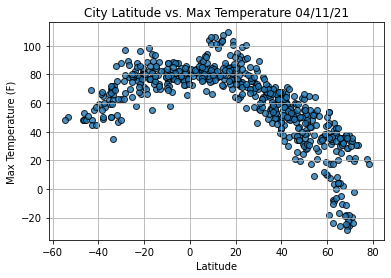

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

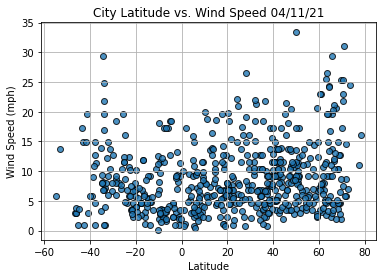

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()